# Introducing Llama 3.2 vision models on Amazon Bedrock

![llama 3.2 vision](./img/llama32vision.jpeg)

The Llama 3.2 collection of models are now available in Amazon Bedrock. Llama 3.2 represents Meta’s latest advancement in large language models (LLMs). Llama 3.2 models are offered in various sizes, from small and medium-sized multimodal models, 11B and 90B parameter models, capable of sophisticated reasoning tasks including multimodal support for high resolution images to lightweight text-only 1B and 3B parameter models suitable for edge devices. Llama 3.2 is the first Llama model to support vision tasks, with a new model architecture that integrates image encoder representations into the language model.

In addition to the existing text capable Llama 3.1 8B, 70B, and 405B models, Llama 3.2 supports multimodal use cases. You can now use four new Llama 3.2 models — 90B, 11B, 3B, and 1B — from Meta in Amazon Bedrock to unlock the next generation of AI possibilities. With a focus on responsible innovation and system-level safety, Llama 3.2 models help you build and deploy cutting-edge generative AI models and applications, leveraging Llama in Amazon Bedrock to ignite new innovations like image reasoning and are also more accessible for on edge applications. The new models are also designed to be more efficient for AI workloads, with reduced latency and improved performance, making them suitable for a wide range of applications.

This notebook provides you with three examples of how to leverage multi-modality (text, vision) of models in different problem areas. It showcases, how to use boto3 and Bedrock's converse API for seamless and easy access of these models.

In [1]:
!pip install boto3==1.35.18

In [2]:
import boto3

In [3]:
from IPython.display import Image

In [4]:
boto3.__version__

'1.35.18'

# Setup

We start by setting up the Bedrock client for us-west-2 region. Then, we specify the model name. Note, that Meta Llama 3.2 models are avaliable through cross-region inference only. Hence, instead of the model id we are using the cross-region inference id of a specific region. 

In [5]:
client = boto3.client("bedrock-runtime", region_name="us-west-2")
MODEL_NAME = "us.meta.llama3-2-90b-instruct-v1:0"

In [6]:
# Function to load the document
def load_file(path):
    with open(path, "rb") as file:
        return file.read()

# Chart Q&A 

The first use case is a very common one in today's office world: reading out data from charts or diagrams and answering questions on top of that. We are using the Bedrock converse API to place the query consisting of a text and image message assuming the user role. 

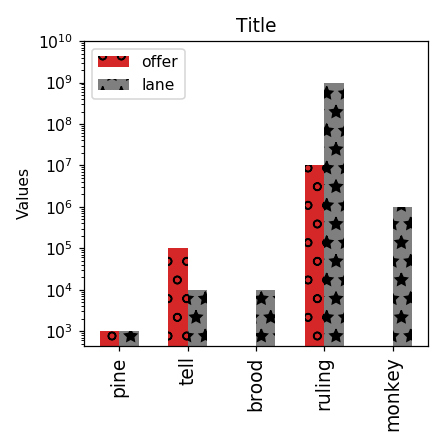

In [7]:
# Prepare the input
query = "What word has the highest count in the chart?"

image_path = "./img/401.png"
image = load_file(image_path)

# Display image
Image(filename=image_path) 

In [8]:
response_img = client.converse(
    modelId=MODEL_NAME,
    inferenceConfig={
        "temperature": 0,
        "maxTokens": 250
    },
    messages=[{
                "role": "user",
                "content": [
                            {
                                "text": query
                            },
                            {
                                "image": {
                                    "format": 'png',
                                    "source": {
                                        "bytes": image
                                    }
                                }
                            }
                        ]
            }]
)
response_img

{'ResponseMetadata': {'RequestId': '79b366a5-685d-43d6-98b3-4050d8dcecc1',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Mon, 07 Oct 2024 22:13:22 GMT',
   'content-type': 'application/json',
   'content-length': '696',
   'connection': 'keep-alive',
   'x-amzn-requestid': '79b366a5-685d-43d6-98b3-4050d8dcecc1'},
  'RetryAttempts': 0},
 'output': {'message': {'role': 'assistant',
   'content': [{'text': "Looking at the bar plot, we can see that there are two groups of bars, 'offer' and 'lane'. Each group has five bars corresponding to the x-labels 'pine', 'tell', 'brood', 'ruling', and 'monkey'. The y-values represent the counts.\n\nTo find the word with the highest count, we need to compare the y-values of all the bars. The highest y-value is 1090000000, which corresponds to the 'ruling' bar in the 'lane' group.\n\nTherefore, the word with the highest count in the chart is 'ruling'.\n\n**Answer:** ruling"}]}},
 'stopReason': 'end_turn',
 'usage': {'inputTokens': 313, 'outputToke

# Understanding and reasoning with screenshot of xlsx file

The second use case showcases how easy it is to integrate more sophisticated documents like Excel or Powerpoint files. While models can't natively process such file types and document parsing of such complex documents usually provides poor results, feeding a screenshot of the documents into a multi-modal model has proven to be very powerful for solving tasks over those documents. Again, we are using the converse API to figure out what is contained in the yellow box. 

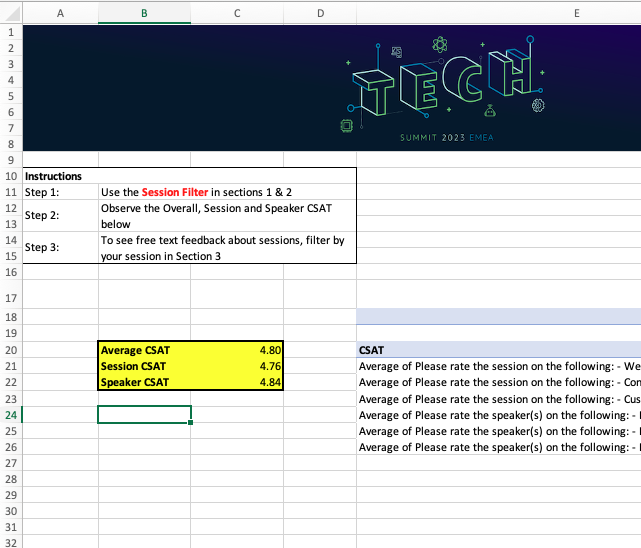

In [9]:
# Prepare the input
query = "What is in the yellow box?"

screenshot_path = "./img/screenshot.png"
screenshot = load_file(screenshot_path)

# Display image
Image(filename=screenshot_path) 

In [10]:
response_screenshot = client.converse(
    modelId=MODEL_NAME,
    inferenceConfig={
        "temperature": 0,
        "maxTokens": 250
    },
    messages=[{
                "role": "user",
                "content": [
                            {
                                "text": query
                            },
                            {
                                "image": {
                                    "format": 'png',
                                    "source": {
                                        "bytes": screenshot
                                    }
                                }
                            }
                        ]
            }]
)
response_screenshot

{'ResponseMetadata': {'RequestId': '29a88938-dbed-4af7-b7eb-d464d31eff7e',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Mon, 07 Oct 2024 22:13:26 GMT',
   'content-type': 'application/json',
   'content-length': '333',
   'connection': 'keep-alive',
   'x-amzn-requestid': '29a88938-dbed-4af7-b7eb-d464d31eff7e'},
  'RetryAttempts': 0},
 'output': {'message': {'role': 'assistant',
   'content': [{'text': "The yellow box contains the average CSAT scores for the session and speaker, which are 4.80 and 4.76, respectively. The speaker's CSAT score is 4.84."}]}},
 'stopReason': 'end_turn',
 'usage': {'inputTokens': 511, 'outputTokens': 42, 'totalTokens': 553},
 'metrics': {'latencyMs': 3677}}

# Advanced mathematical reasoning (MathVista example) 

Finally, we are looking into an advanced mathematical reasoning example sourced out of the MathVista benchmarking dataset. We want the model to figure out the degree of ∠CAB based on some input parameters. The answer is in multiple-choice format. This task goes way beyond multi-modal perception and understanding and requires complex reasoning. Again, we are using the Bedrock converse API for placing this task. 
Hint: the right answer is (C) 64°.

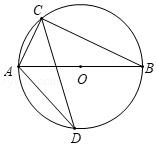

In [11]:
# Prepare the input
query = "Please answer the question and provide the correct option letter, e.g., A, B, C, D, at the end. Question: As shown in the figure, AB is the diameter of ⊙O, CD is the chord of ⊙O, ∠ADC = 26.0, then the degree of ∠CAB is () Choices: (A) 26° (B) 74° (C) 64° (D) 54°"

geometry_path = "./img/geometry.png"
geometry_figure = load_file(geometry_path)

# Display image
Image(filename=geometry_path) 

In [12]:
response_geometry = client.converse(
    modelId=MODEL_NAME,
    inferenceConfig={
        "temperature": 0,
        "topP": 0.9,
        "maxTokens": 512
    },
    messages=[{
                "role": "user",
                "content": [
                            {
                                "text": query
                            },
                            {
                                "image": {
                                    "format": 'png',
                                    "source": {
                                        "bytes": geometry_figure
                                    }
                                }
                            }
                        ]
            }]
)
response_geometry

{'ResponseMetadata': {'RequestId': 'eea7f8e0-dcaa-41b0-94f6-b9f80d9dfcdc',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Mon, 07 Oct 2024 22:14:00 GMT',
   'content-type': 'application/json',
   'content-length': '1999',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'eea7f8e0-dcaa-41b0-94f6-b9f80d9dfcdc'},
  'RetryAttempts': 0},
 'output': {'message': {'role': 'assistant',
   'content': [{'text': "To find the degree of ∠CAB, we can use the properties of a circle and its angles. Since AB is the diameter of ⊙O, it divides the circle into two semicircles. The angle subtended by a diameter at the circumference is always 90 degrees.\n\nGiven that ∠ADC = 26.0 degrees, we know that this angle is inscribed in one of the semicircles formed by diameter AB. The angle subtended by a chord at the center of the circle is twice the angle subtended by the same chord at any point on the circumference.\n\nLet's denote the center of the circle as O. Then, ∠AOC = 2 * ∠ADC = 2 * 26.0 = 52.0 d